In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns 

filepath = '/home/disk/sipn/mcmcgraw/python/data_VRILEs/text_files/MODELS/ecmwfsipn/reforecast/'

data = pd.read_csv(filepath+'STATS_SIC_5day_change_ecmwfsipn_ALL_ENS_Kara-Laptev_JJAS_2.csv',\
                   header=None)
data_2 = pd.read_csv(filepath+'STATS_SIC_5day_change_ecmwfsipn_ALL_ENS_Central Arctic_JJAS_2.csv',\
                   header=None)
data_3 = pd.read_csv(filepath+'STATS_SIC_5day_change_ecmwfsipn_ALL_ENS_East Greenland Sea_JJAS_2.csv',\
                   header=None)
data_PA = pd.read_csv(filepath+'STATS_SIC_5day_change_ecmwfsipn_ALL_ENS_panArctic_JJAS_2.csv',\
                   header=None)
data_5 = pd.read_csv(filepath+'STATS_SIC_5day_change_ecmwfsipn_ALL_ENS_Barents Sea_JJAS_2.csv',\
                   header=None)
data_6 = pd.read_csv(filepath+'STATS_SIC_5day_change_ecmwfsipn_ALL_ENS_Barents-Kara_JJAS_2.csv',\
                   header=None)
data_7 = pd.read_csv(filepath+'STATS_SIC_5day_change_ecmwfsipn_ALL_ENS_East-Siberian-Beaufort-Chukchi_JJAS_2.csv',\
                   header=None)
region_names = {'Kara-Laptev','CentralArctic','EastGreenland','Barents',\
                'East-Siberian-Beaufort-Chukchi'}
#print(data)

fart = data.loc[0,1:25]
#print(fart)
#row_new = np.array([])
#with open(filepath+'STATS_SIC_5day_change_ecmwfsipn_ALL_ENS_Kara-Laptev_JJAS.csv','r') as csv_file:
#    reader = csv.reader(csv_file,delimiter=',',quotechar='|')
#    w = []
#    for row in reader:
#        w.extend(row)
        
#print(w)

In [4]:
#fart2 = fart.astype(float)
MEAN = data.loc[0,1:25].astype(float)
VARIANCE = data.loc[1,1:25].astype(float)
SKEW = data.loc[2,1:25].astype(float)
KURT = data.loc[3,1:25].astype(float)
MEAN = np.vstack((MEAN,data_2.loc[0,1:25].astype(float),data_3.loc[0,1:25].astype(float),\
                 data_5.loc[0,1:25].astype(float),data_7.loc[0,1:25].astype(float)))
#print(MEAN.shape)
VARIANCE = np.vstack((VARIANCE,data_2.loc[1,1:25].astype(float),data_3.loc[1,1:25].astype(float),\
                 data_5.loc[1,1:25].astype(float),data_7.loc[1,1:25].astype(float)))
SKEW = np.vstack((SKEW,data_2.loc[2,1:25].astype(float),data_3.loc[2,1:25].astype(float),\
                 data_5.loc[2,1:25].astype(float),data_7.loc[2,1:25].astype(float)))
KURT = np.vstack((KURT,data_2.loc[3,1:25].astype(float),data_3.loc[3,1:25].astype(float),\
                 data_5.loc[3,1:25].astype(float),data_7.loc[3,1:25].astype(float)))
print(MEAN.shape)

(5, 25)


In [5]:
#Load obs
OBS_filepath = '/home/disk/sipn/mcmcgraw/python/data_VRILEs/text_files/OBS/'
data_OBS = pd.read_csv(OBS_filepath+'NSIDC_SIE_delta_5day_change_Kara-Laptev_JJAS_NO_dt.txt',header=None)
data_2_OBS = pd.read_csv(OBS_filepath+'NSIDC_SIE_delta_5day_change_CentralArctic_JJAS_NO_dt.txt',header=None)
data_3_OBS = pd.read_csv(OBS_filepath+'NSIDC_SIE_delta_5day_change_EastGreenlandSea_JJAS_NO_dt.txt',header=None)
data_5_OBS = pd.read_csv(OBS_filepath+'NSIDC_SIE_delta_5day_change_BarentsSea_JJAS_NO_dt.txt',header=None)
data_7_OBS = pd.read_csv(OBS_filepath+'NSIDC_SIE_delta_5day_change_East-Siberian-Beaufort-Chukchi_JJAS_NO_dt.txt',header=None)
data_PA_OBS = pd.read_csv(OBS_filepath+'NSIDC_SIE_delta_5day_change_panArctic_JJAS_NO_dt.txt',header=None)

SIE_obs = data_OBS.astype(float)
MEAN_obs = np.vstack((np.nanmean(SIE_obs),np.nanmean(data_2_OBS.astype(float)),np.nanmean(data_3_OBS.astype(float)),\
                     np.nanmean(data_5_OBS.astype(float)),np.nanmean(data_7_OBS.astype(float))))
VAR_obs = np.vstack((np.nanvar(SIE_obs),np.nanvar(data_2_OBS.astype(float)),np.nanvar(data_3_OBS.astype(float)),\
                     np.nanvar(data_5_OBS.astype(float)),np.nanvar(data_7_OBS.astype(float))))
#SKEW_obs = stats.skew(SIE_obs,nan_policy='omit')
SKEW_obs = np.vstack((stats.skew(SIE_obs,nan_policy='omit'),stats.skew(data_2_OBS.astype(float),nan_policy='omit'),stats.skew(data_3_OBS.astype(float),nan_policy='omit'),\
                     stats.skew(data_5_OBS.astype(float),nan_policy='omit'),stats.skew(data_7_OBS.astype(float),nan_policy='omit')))
KURT_obs = np.vstack((stats.kurtosis(SIE_obs,nan_policy='omit'),stats.kurtosis(data_2_OBS.astype(float),nan_policy='omit'),stats.kurtosis(data_3_OBS.astype(float),nan_policy='omit'),\
                     stats.kurtosis(data_5_OBS.astype(float),nan_policy='omit'),stats.kurtosis(data_7_OBS.astype(float),nan_policy='omit')))



In [6]:
print(stats.skew(data_7_OBS.astype(float),nan_policy='omit'))

[-0.41976366]


Text(0.5, 1.0, 'MEAN, JJAS 5-day change in SIC, ECMWF ensemble members')

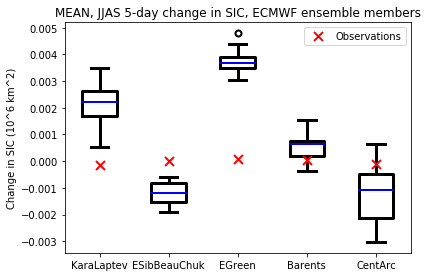

In [7]:
plot_region_names = {'KarLap','ESBC','EGRE','BAR','cenArc'}
medianprops = {'color': 'blue', 'linewidth': 2}
boxprops = {'color': 'black', 'linestyle': '-', 'linewidth': 3}
whiskerprops = {'color': 'black', 'linestyle': '-', 'linewidth': 3}
capprops = {'color': 'black', 'linestyle': '-', 'linewidth': 3}
flierprops = {'color': 'black', 'marker': 'o', 'markersize': 6, 'markeredgewidth': 2}

fig1 = plt.figure()
ax1 = fig1.add_axes([0.1,0.1,0.8,0.8])
fart = ax1.boxplot(np.transpose(MEAN),medianprops=medianprops,boxprops=boxprops,whiskerprops=whiskerprops,
                  capprops=capprops,flierprops=flierprops)
obsplt=ax1.plot(np.arange(1,6),MEAN_obs,'rx',markersize=9,markeredgewidth=2)
ax1.set_xticklabels(['KaraLaptev','ESibBeauChuk','EGreen','Barents','CentArc'])
ax1.legend(obsplt,['Observations'])
ax1.set_ylabel('Change in SIC (10^6 km^2)')
ax1.set_title('MEAN, JJAS 5-day change in SIC, ECMWF ensemble members')

Text(0.5, 1.0, 'VARIANCE, JJAS 5-day change in SIC, ECMWF ensemble members')

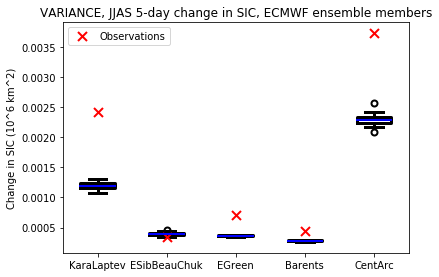

In [291]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0.1,0.1,0.8,0.8])
ax2.boxplot(np.transpose(VARIANCE),medianprops=medianprops,boxprops=boxprops,whiskerprops=whiskerprops,
                  capprops=capprops,flierprops=flierprops)
obsplt2=ax2.plot(np.arange(1,6),VAR_obs,'rx',markersize=9,markeredgewidth=2)
ax2.set_xticklabels(['KaraLaptev','ESibBeauChuk','EGreen','Barents','CentArc'])
ax2.legend(obsplt2,['Observations'])
ax2.set_ylabel('Change in SIC (10^6 km^2)')
ax2.set_title('VARIANCE, JJAS 5-day change in SIC, ECMWF ensemble members')

Text(0.5, 1.0, 'SKEWNESS, JJAS 5-day change in SIC, ECMWF ensemble members')

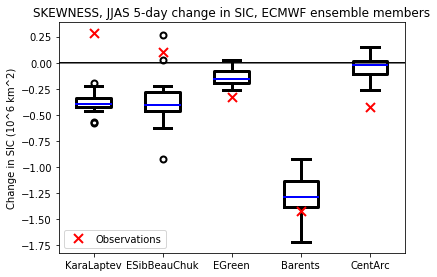

In [295]:
fig3 = plt.figure()
ax3 = fig3.add_axes([0.1,0.1,0.8,0.8])
ax3.plot(np.arange(0,10,0.001),np.zeros(10000),'k')
ax3.boxplot(np.transpose(SKEW),medianprops=medianprops,boxprops=boxprops,whiskerprops=whiskerprops,
                  capprops=capprops,flierprops=flierprops)
obsplt3=ax3.plot(np.arange(1,6),SKEW_obs,'rx',markersize=9,markeredgewidth=2)
ax3.set_xticklabels(['KaraLaptev','ESibBeauChuk','EGreen','Barents','CentArc'])
ax3.legend(obsplt3,['Observations'],loc='lower left')
ax3.set_ylabel('Change in SIC (10^6 km^2)')
ax3.set_title('SKEWNESS, JJAS 5-day change in SIC, ECMWF ensemble members')

Text(0.5, 1.0, 'KURTOSIS, JJAS 5-day change in SIC, ECMWF ensemble members')

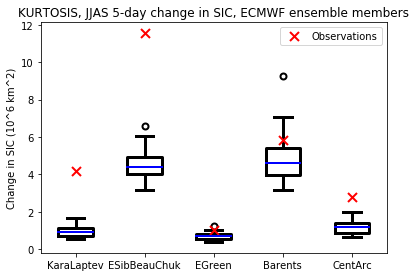

In [296]:
fig4 = plt.figure()
ax4 = fig4.add_axes([0.1,0.1,0.8,0.8])
ax4.boxplot(np.transpose(KURT),medianprops=medianprops,boxprops=boxprops,whiskerprops=whiskerprops,
                  capprops=capprops,flierprops=flierprops)
obsplt4=ax4.plot(np.arange(1,6),KURT_obs,'rx',markersize=9,markeredgewidth=2)
#ax4.plot(np.arange(0,10,0.001),np.ones(10000),'k')
ax4.set_xticklabels(['KaraLaptev','ESibBeauChuk','EGreen','Barents','CentArc'])
ax4.legend(obsplt4,['Observations'],loc='upper right')
ax4.set_ylabel('Change in SIC (10^6 km^2)')
ax4.set_title('KURTOSIS, JJAS 5-day change in SIC, ECMWF ensemble members')

In [247]:
##Pan Arctic (do separately b/c of magnitude)

MEAN_PA = data_PA.loc[0,1:25].astype(float)
VARIANCE_PA = data_PA.loc[1,1:25].astype(float)
SKEW_PA = data_PA.loc[2,1:25].astype(float)
KURT_PA = data_PA.loc[3,1:25].astype(float)

mean_PA_obs = np.nanmean(data_PA_OBS.astype(float))
var_PA_obs = np.nanvar(data_PA_OBS.astype(float))
skew_PA_obs = stats.skew(data_PA_OBS.astype(float),nan_policy='omit')
kurt_PA_obs = stats.kurtosis(data_PA_OBS.astype(float),nan_policy='omit')

Text(0.5, 1.0, 'JJAS 5-day change in pan-Arctic SIC, ECMWF ensemble members')

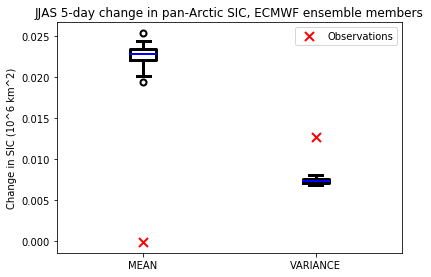

In [298]:
fig5 = plt.figure()
ax5 = fig5.add_axes([0.1,0.1,0.8,0.8])
ax5.boxplot([np.transpose(MEAN_PA),np.transpose(VARIANCE_PA)],medianprops=medianprops,boxprops=boxprops,whiskerprops=whiskerprops,
                  capprops=capprops,flierprops=flierprops)
obsplt5=ax5.plot([1,2],[mean_PA_obs,var_PA_obs],'rx',markersize=9,markeredgewidth=2)
#ax5.plot(np.arange(0,10,0.001),np.ones(10000),'k')
ax5.set_xticklabels(['MEAN','VARIANCE'])
ax5.legend(obsplt5,['Observations'],loc='upper right')
ax5.set_ylabel('Change in SIC (10^6 km^2)')
ax5.set_title('JJAS 5-day change in pan-Arctic SIC, ECMWF ensemble members')

Text(0.5, 1.0, 'JJAS 5-day change in pan-Arctic SIC, ECMWF ensemble members')

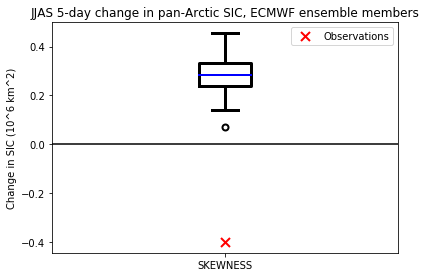

In [299]:
fig6 = plt.figure()
ax6 = fig6.add_axes([0.1,0.1,0.8,0.8])
ax6.boxplot([np.transpose(SKEW_PA)],medianprops=medianprops,boxprops=boxprops,whiskerprops=whiskerprops,
                  capprops=capprops,flierprops=flierprops)
obsplt6=ax6.plot([1],[skew_PA_obs],'rx',markersize=9,markeredgewidth=2)
ax6.plot(np.arange(0,10,0.001),np.zeros(10000),'k')
ax6.set_xticklabels(['SKEWNESS'])
ax6.legend(obsplt6,['Observations'],loc='upper right')
ax6.set_ylabel('Change in SIC (10^6 km^2)')
ax6.set_title('JJAS 5-day change in pan-Arctic SIC, ECMWF ensemble members')

Text(0.5, 1.0, 'SKEWNESS, JJAS 5-day change in SIC, ECMWF ensemble members')

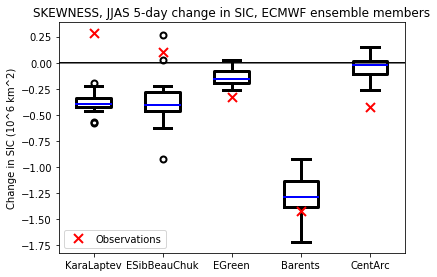

In [286]:
fig7 = plt.figure()
ax7 = fig7.add_axes([0.1,0.1,0.8,0.8])
medianprops = {'color': 'blue', 'linewidth': 2}
boxprops = {'color': 'black', 'linestyle': '-', 'linewidth': 3}
whiskerprops = {'color': 'black', 'linestyle': '-', 'linewidth': 3}
capprops = {'color': 'black', 'linestyle': '-', 'linewidth': 3}
flierprops = {'color': 'black', 'marker': 'o', 'markersize': 6, 'markeredgewidth': 2}
ax7.plot(np.arange(0,10,0.001),np.zeros(10000),'k')
ax7.boxplot(np.transpose(SKEW),medianprops=medianprops,
           boxprops=boxprops,
           whiskerprops=whiskerprops,
           capprops=capprops,flierprops=flierprops)
obsplt7=ax7.plot(np.arange(1,6),SKEW_obs,'rx',markersize=9,markeredgewidth=2)
ax7.set_xticklabels(['KaraLaptev','ESibBeauChuk','EGreen','Barents','CentArc'])
ax7.legend(obsplt7,['Observations'],loc='lower left')
ax7.set_ylabel('Change in SIC (10^6 km^2)')
ax7.set_title('SKEWNESS, JJAS 5-day change in SIC, ECMWF ensemble members')
